# Logistic Regression
1. 회귀와 분류 모두에 사용할 수 있다. 
1. 종속 변수가 이항 분포를 따르고 그 모수 $\theta$가 독립 변수 $x$에 의존한다고 가정한다. 

$$p(y \mid x) = \text{Bin} (y \mid \theta(x), N)$$

$y$의 값이 특정 구간 내의 값만 가질 수 있기 때문에, 종속 변수가 이러한 특성을 가진 경우에만 회귀 분석 방법으로 쓸 수 있다. *일반적인 회귀의 경우, 수식상으로는 x가 무한히 증가하면 y도 무한히 증가.*

또는 이항 분포의 특별한 경우$(N=1)$로 $y$가 베르누이 확률 분포인 경우도 있을 수 있다. 여기에서는 베르누이 확률 분포를 따르는 로지스틱 회귀 분석만 고려한다.

$$p(y \mid x) = \text{Bern} (y \mid  \theta(x) )$$

즉, $y$가 1, 혹은 0 이다.

# Sigmoid function
위에서 말한 모수 $\theta$는 $x$의 함수 $\theta(x)$이다. 이 함수는 $x$에 대한 선형 함수를 0부터 1사이의 값만 나올 수 있도록 시그모이드라는 함수를 이용하여 변형한 것을 사용한다.

$$\theta = f(w^Tx)$$

### 시그모이드 함수는
 1. 종속 변수의 모든 실수 값에 대해 
 1. 유한한 구간 $(a, b)$ 사이의 한정된(bounded) 값과
 1. 항상 0 또는 양의 기울기를 가지는 
 1. 함수의 *집합* 이다.
 
다음과 같은 함수들이 주로 사용된다.
- 오차 함수
  $$\text{erf}(z) = \frac{2}{\sqrt\pi}\int_0^z e^{-t^2}\,dt$$

 Nomal distribution의 cdf를 늘려놓은 것과 같다. 계산이 힘들기 때문에 실제적으로는 쓰지 않음
 
밑의 두개를 주로 쓴다.

- 로지스틱 함수
$$\text{logistic}(z) = \sigma(z) = \dfrac{1}{1+\exp{(-z)}}$$

 
    여기서는 이 함수를 쓴다.
- 하이퍼볼릭 탄젠트 함수
$$\tanh(z) = \frac{\sinh z}{\cosh z} = \frac {e^z - e^{-z}} {e^z + e^{-z}} = 2 \sigma(2x) - 1$$

    
    나중에 나올 Neural Network에서 사용하는 경우가 많다.

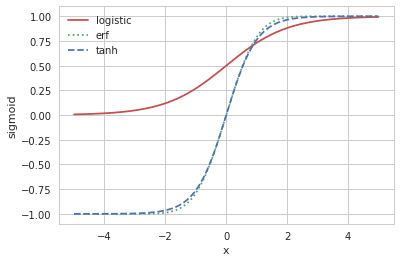

In [2]:
%matplotlib inline
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="logistic")
plt.plot(xx, sp.special.erf(0.5*np.sqrt(np.pi)*xx), 'g:', label="erf")
plt.plot(xx, np.tanh(xx), 'b--', label="tanh")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.xlabel("x")
plt.ylabel("sigmoid")
plt.show()

# Logistic function
여러 시그모이드 중 로지스틱 함수는 다음과 같은 물리적 의미를 부여할 수 있음

1) Bernoulli 시도에서 1이 나올 확률 $\theta$과 0이 나올 확률 $1-\theta$의 비(ratio)는 다음과 같은 수식이 되며, 이를 odds ratio라고 한다.

$$\text{odds ratio} = \dfrac{\theta}{1-\theta}$$


2) 0부터 1사이의 값만 가지는 $\theta$를 odds ratio로 변환하면 0부터 $ \infty$의 값을 가질 수 있다.
이 odds ratio를 로그 변환한 것이 Logit function

$$z = \text{logit}(\text{odds ratio}) = \log \left(\dfrac{\theta}{1-\theta}\right)$$

3) Logistic function은 이 Logit function의 **역함수**. 즉 $-\infty$부터 $\infty$까지의 값을 가지는 변수를 0부터 1 사이의 값으로 변환한 결과이다.

$$\text{logitstic}(z) = \theta(z) = \dfrac{1}{1+\exp{(-z)}}$$

# Decision function
로지스틱 함수 $\sigma(z)$를 모수 함수로 사용하는 경우에는 $z$값과 $\theta$값은 다음과 같은 관계를 가진다.
- $z = 0$ 일 때 $\theta = 0.5$
-  $z > 0$ 일 때 $\theta > 0.5$
-  $z < 0$ 일 때 $\theta < 0.5$

**즉, Z 가 분류 모형의 판별 함수(decision function)의 역할을 한다.**
로지스틱 회귀 모형에서는 판별 함수 $z$를 $x$의 선형 함수로 가정한다.
$$z = w^Tx$$

$$\theta(x) = \dfrac{1}{1+\exp{(-w^Tx)}}$$


# 로지스틱 모형의 모수 추정
일종의 비선형 회귀 모형이지만, 다음과 같이  MLE 방법으로 모수 $w$를 추정할 수 있다.

y가 베르누이 확률 변수라고 가정,
$$p(y \mid x) = \text{Bern} (y \mid  \theta(x;w) )$$

$\theta$가 로지스틱 함수 형태로 표현된다면

$$\theta(x;w) = \dfrac{1}{1 + \exp{(-w^Tx)}}$$


(중략)


$$\begin{eqnarray}
\dfrac{\partial \text{LL}}{\partial w} 
&=& \sum_{i=1}^N \left( y_i \dfrac{1}{\theta_i(x_i;w)} - (1-y_i)\dfrac{1}{1-\theta_i(x_i;w)} \right) \theta(x_i;w)(1-\theta(x_i;w)) x_i   \\
&=& \sum_{i=1}^N \big( y_i (1-\theta_i(x_i;w)) - (1-y_i)\theta_i(x_i;w)  \big)  x_i \\
&=& \sum_{i=1}^N \big( y_i  - \theta_i(x_i;w) \big) x_i \\
\end{eqnarray}$$

1. 이 값은 $w$에 대한 비선형 함수다.
1. 따라서 선형 모형과 같이 간단하게 그레디언트가 0이 되는 모수 $w$값에 대한 수식을 구할 수 없다.
1. 그렇기 때문에 수치적 최적화 방법(numerical optimization)을 통해 최적 모수 $w$ 값을 구해야 한다.

# 수치적 최적화
단순 Steepest Gradient 방법을 사용한다면 최적화 알고리즘은 다음과 같다.

$$g_k = \dfrac{d}{dw}(-LL)$$ 

이 방향으로 step size $\eta_k$만큼 움직이면 다음과 같이 반복적으로 최적 모수 값을 구할 수 있다.

$$\begin{eqnarray}
w_{k+1} 
&=& w_{k} - \eta_k g_k \\
&=& w_{k} + \eta_k \sum_{i=1}^N \big( y_i  - \theta_i(x_i; w_k) \big) x_i\\
\end{eqnarray}$$

# 정규화
로지스틱 회귀에서도 과최적화 방지를 위해 ridge, lasso, elastic net 방식의 정규화 패널티를 목적 함수인 LogLikelihood에 추가할 수 있다.
- ridge의 예
$$J = -\text{LL} + \lambda w^Tw$$ 